In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from collections import defaultdict
import numpy as np
from torch.utils.data import DataLoader
from random import sample
import torch
import medmnist
import matplotlib.pyplot as plt 
import numpy as np

from vae_based_medical_image_generator.model.cvae import ConditionalVariationalAutoencoder
from vae_based_medical_image_generator.data import dataset

def generate_images_for_each_class(model: ConditionalVariationalAutoencoder, dataset: medmnist.dataset.MedMNIST,labels: list[str], samples_per_class: int, device: torch.device):
    """
    Generate and plot images for each class in a conditional variational autoencoder.

    Args:
        model (ConditionalVariationalAutoencoder): The trained conditional variational autoencoder model.
        labels (list[str]): A list of labels for each class.
        samples_per_class (int): The number of images to generate per class.
        device (torch.device): The device to use for the generated images.
    """
    num_classes = len(labels)
    one_hot_labels = torch.nn.functional.one_hot(torch.arange(num_classes)).repeat(samples_per_class, 1).to(device)
    generated_images = model.generate(one_hot_labels).cpu()

    fig = plt.figure(figsize=(2*samples_per_class, 2*num_classes), layout="constrained")
    fig.suptitle('Generated Images for all classes')
    for row, subfig in enumerate(fig.subfigures(nrows=num_classes, ncols=1)):
        subfig.suptitle(f'{labels[row]}')
        class_subfigures = subfig.subfigures(nrows=1, ncols=2)

        class_subfigures[0].suptitle("Original")
        original_images = torch.utils.data.Subset(dataset, np.argwhere(np.argmax(dataset.labels, axis=1) == row).squeeze())
        for col, ax in enumerate(class_subfigures[0].subplots(nrows=1, ncols=samples_per_class)):
            ax.imshow(original_images[col][0].movedim(0, -1))
            ax.axis('off')

        class_subfigures[1].suptitle("Generated")
        for col, ax in enumerate(class_subfigures[1].subplots(nrows=1, ncols=samples_per_class)):
            ax.imshow(generated_images[col*num_classes + row].movedim(0, -1))
            ax.axis('off')
    plt.show()


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
from vae_based_medical_image_generator.train import reconstruct_image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = dataset.load_dataset(dataset_name="chestmnist", split='train')
labels = list(train_dataset.info["label"].values())
samples_per_class = 10

model = ConditionalVariationalAutoencoder(image_channels=1, n_labels=len(labels), latent_dimension=128, device=device).to(device)
model.load_state_dict(torch.load('../../../models/chestmnist/cvae/lr-0.001-bs-64-latent-128/checkpoint_90.pt'))
test_dataset = dataset.load_dataset(dataset_name="chestmnist", split='test')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


Using downloaded and verified file: /home/workstation/.medmnist/chestmnist.npz
Using downloaded and verified file: /home/workstation/.medmnist/chestmnist.npz


Using downloaded and verified file: /home/workstation/.medmnist/chestmnist.npz


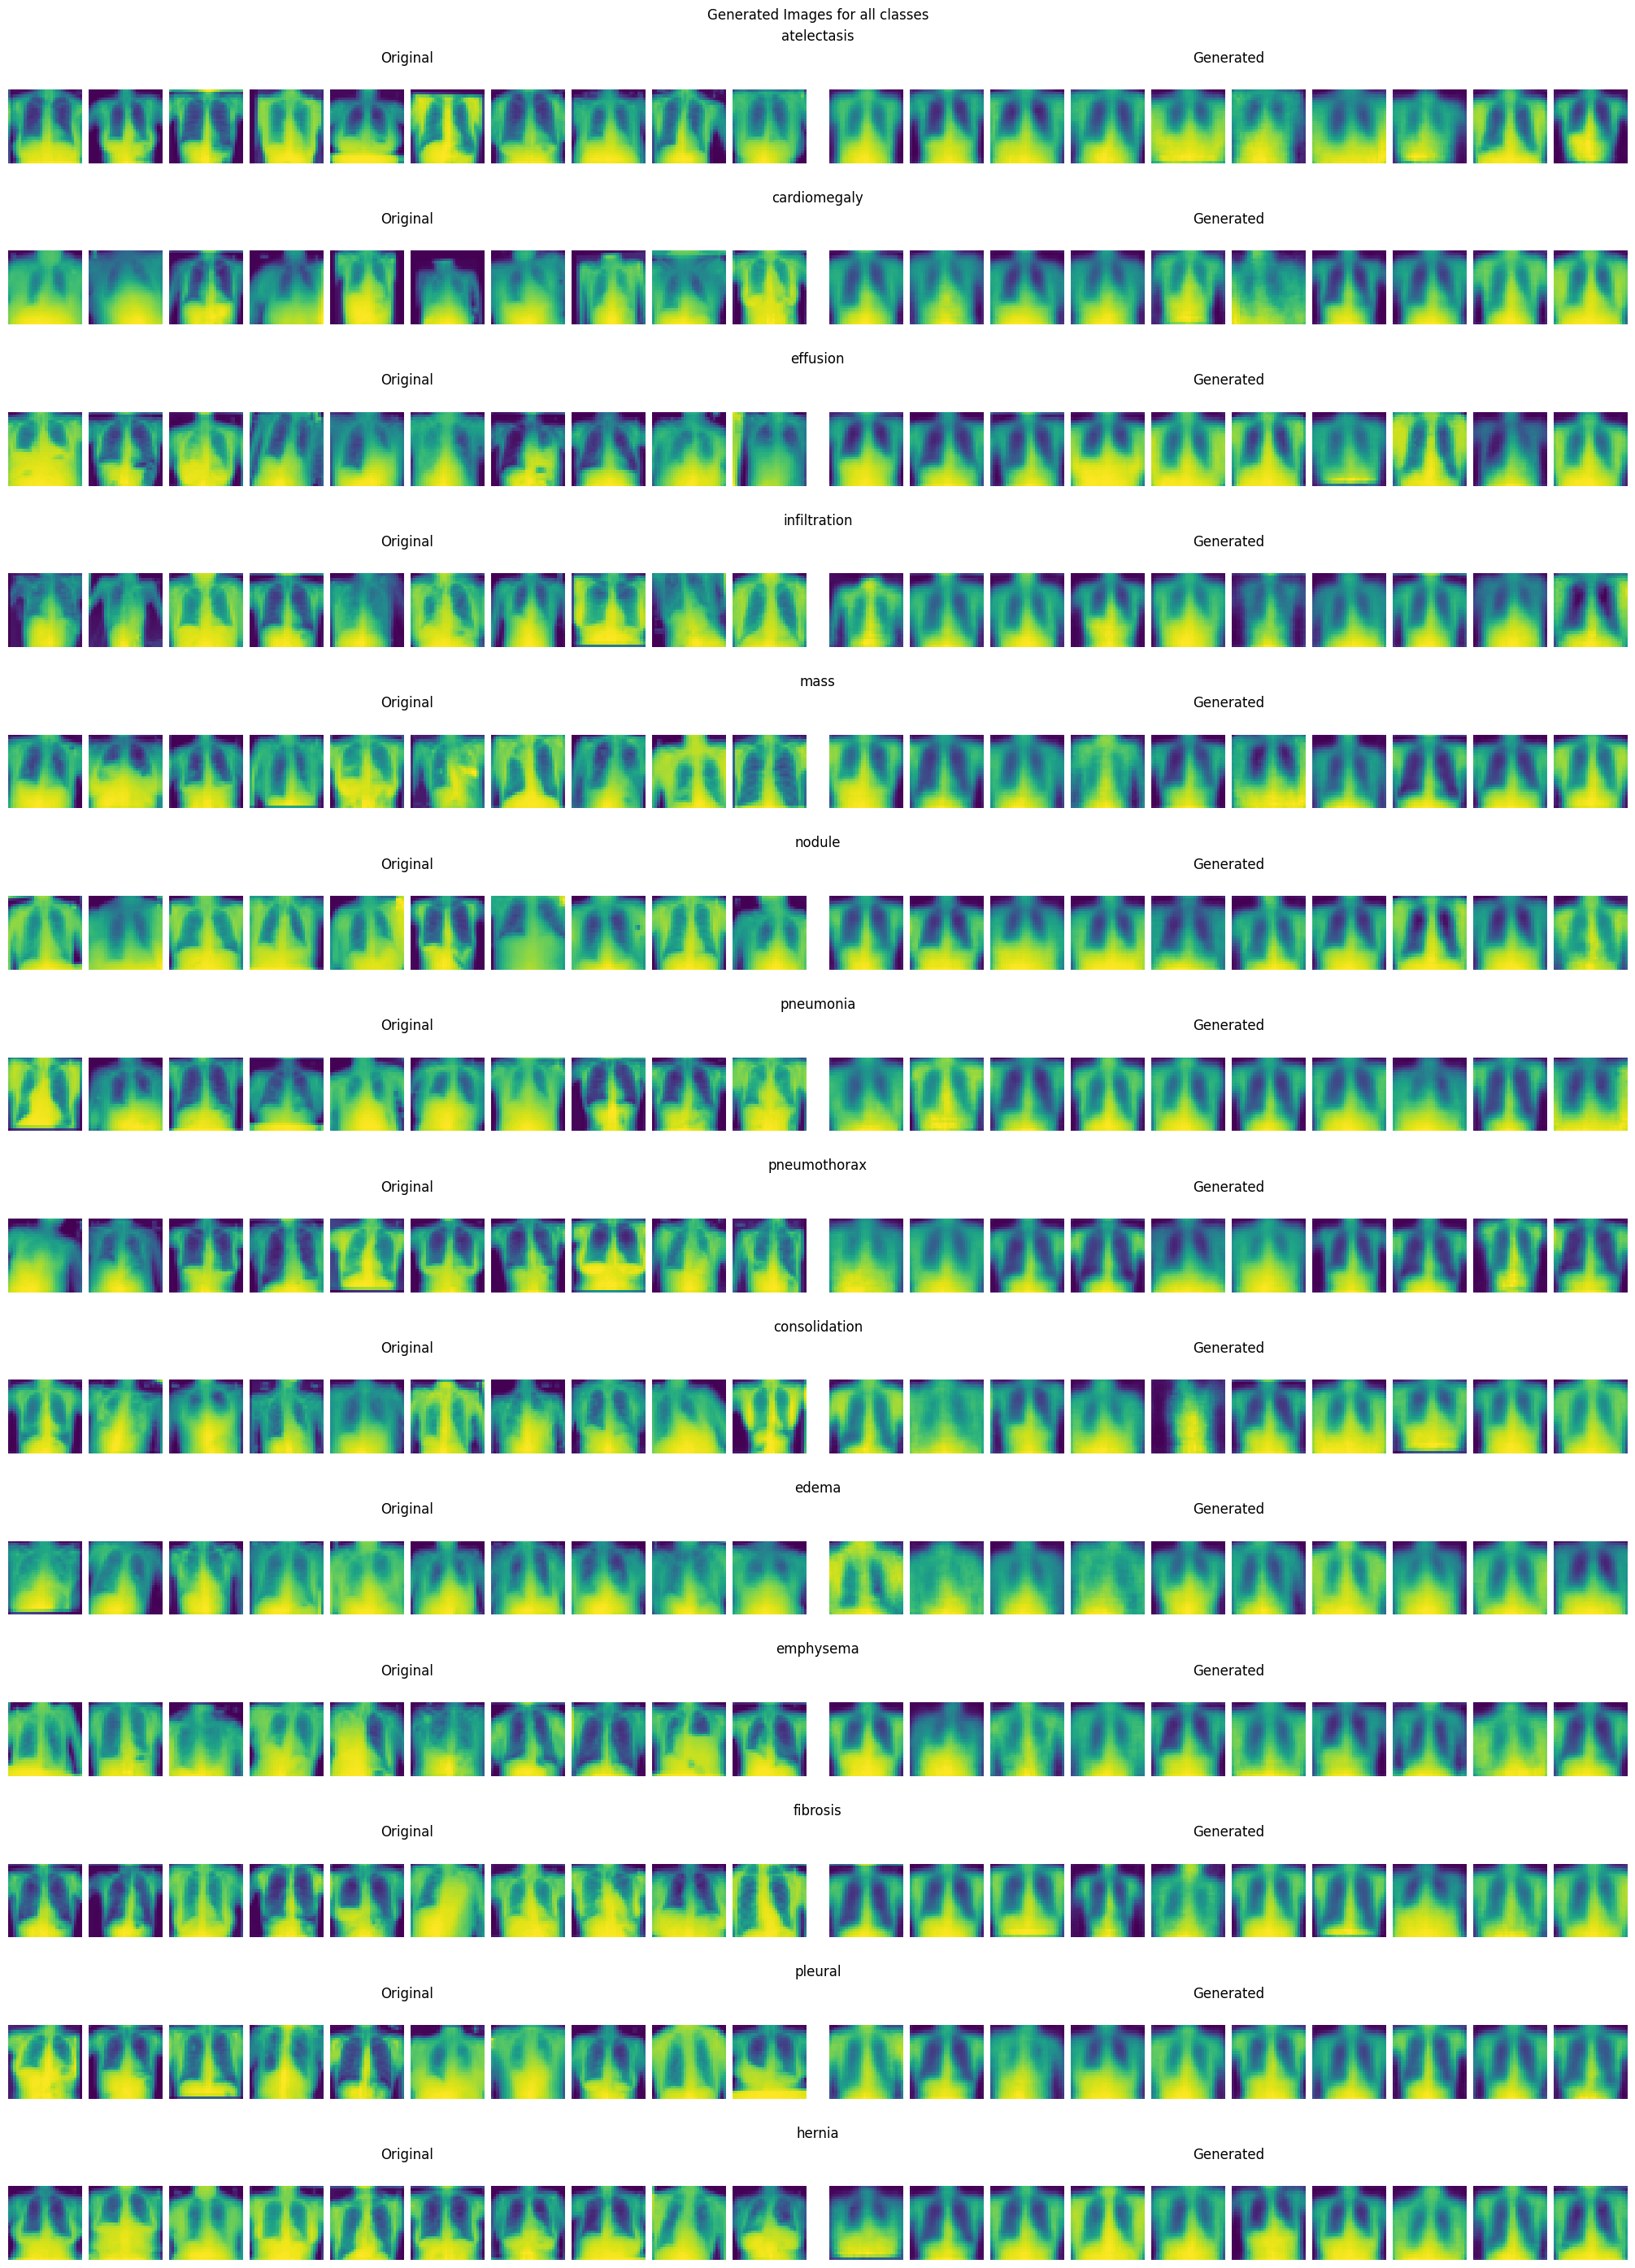

In [4]:
train_dataset = dataset.load_dataset(dataset_name="chestmnist", split='train')
labels = list(train_dataset.info["label"].values())
samples_per_class = 10

model = ConditionalVariationalAutoencoder(image_channels=1, n_labels=len(labels), latent_dimension=128, device=device).to(device)
model.load_state_dict(torch.load('../../../models/chestmnist/cvae/lr-0.001-bs-64-latent-128/checkpoint_100.pt'))

generate_images_for_each_class(model, train_dataset, labels, samples_per_class, device)

Using downloaded and verified file: /home/workstation/.medmnist/bloodmnist.npz


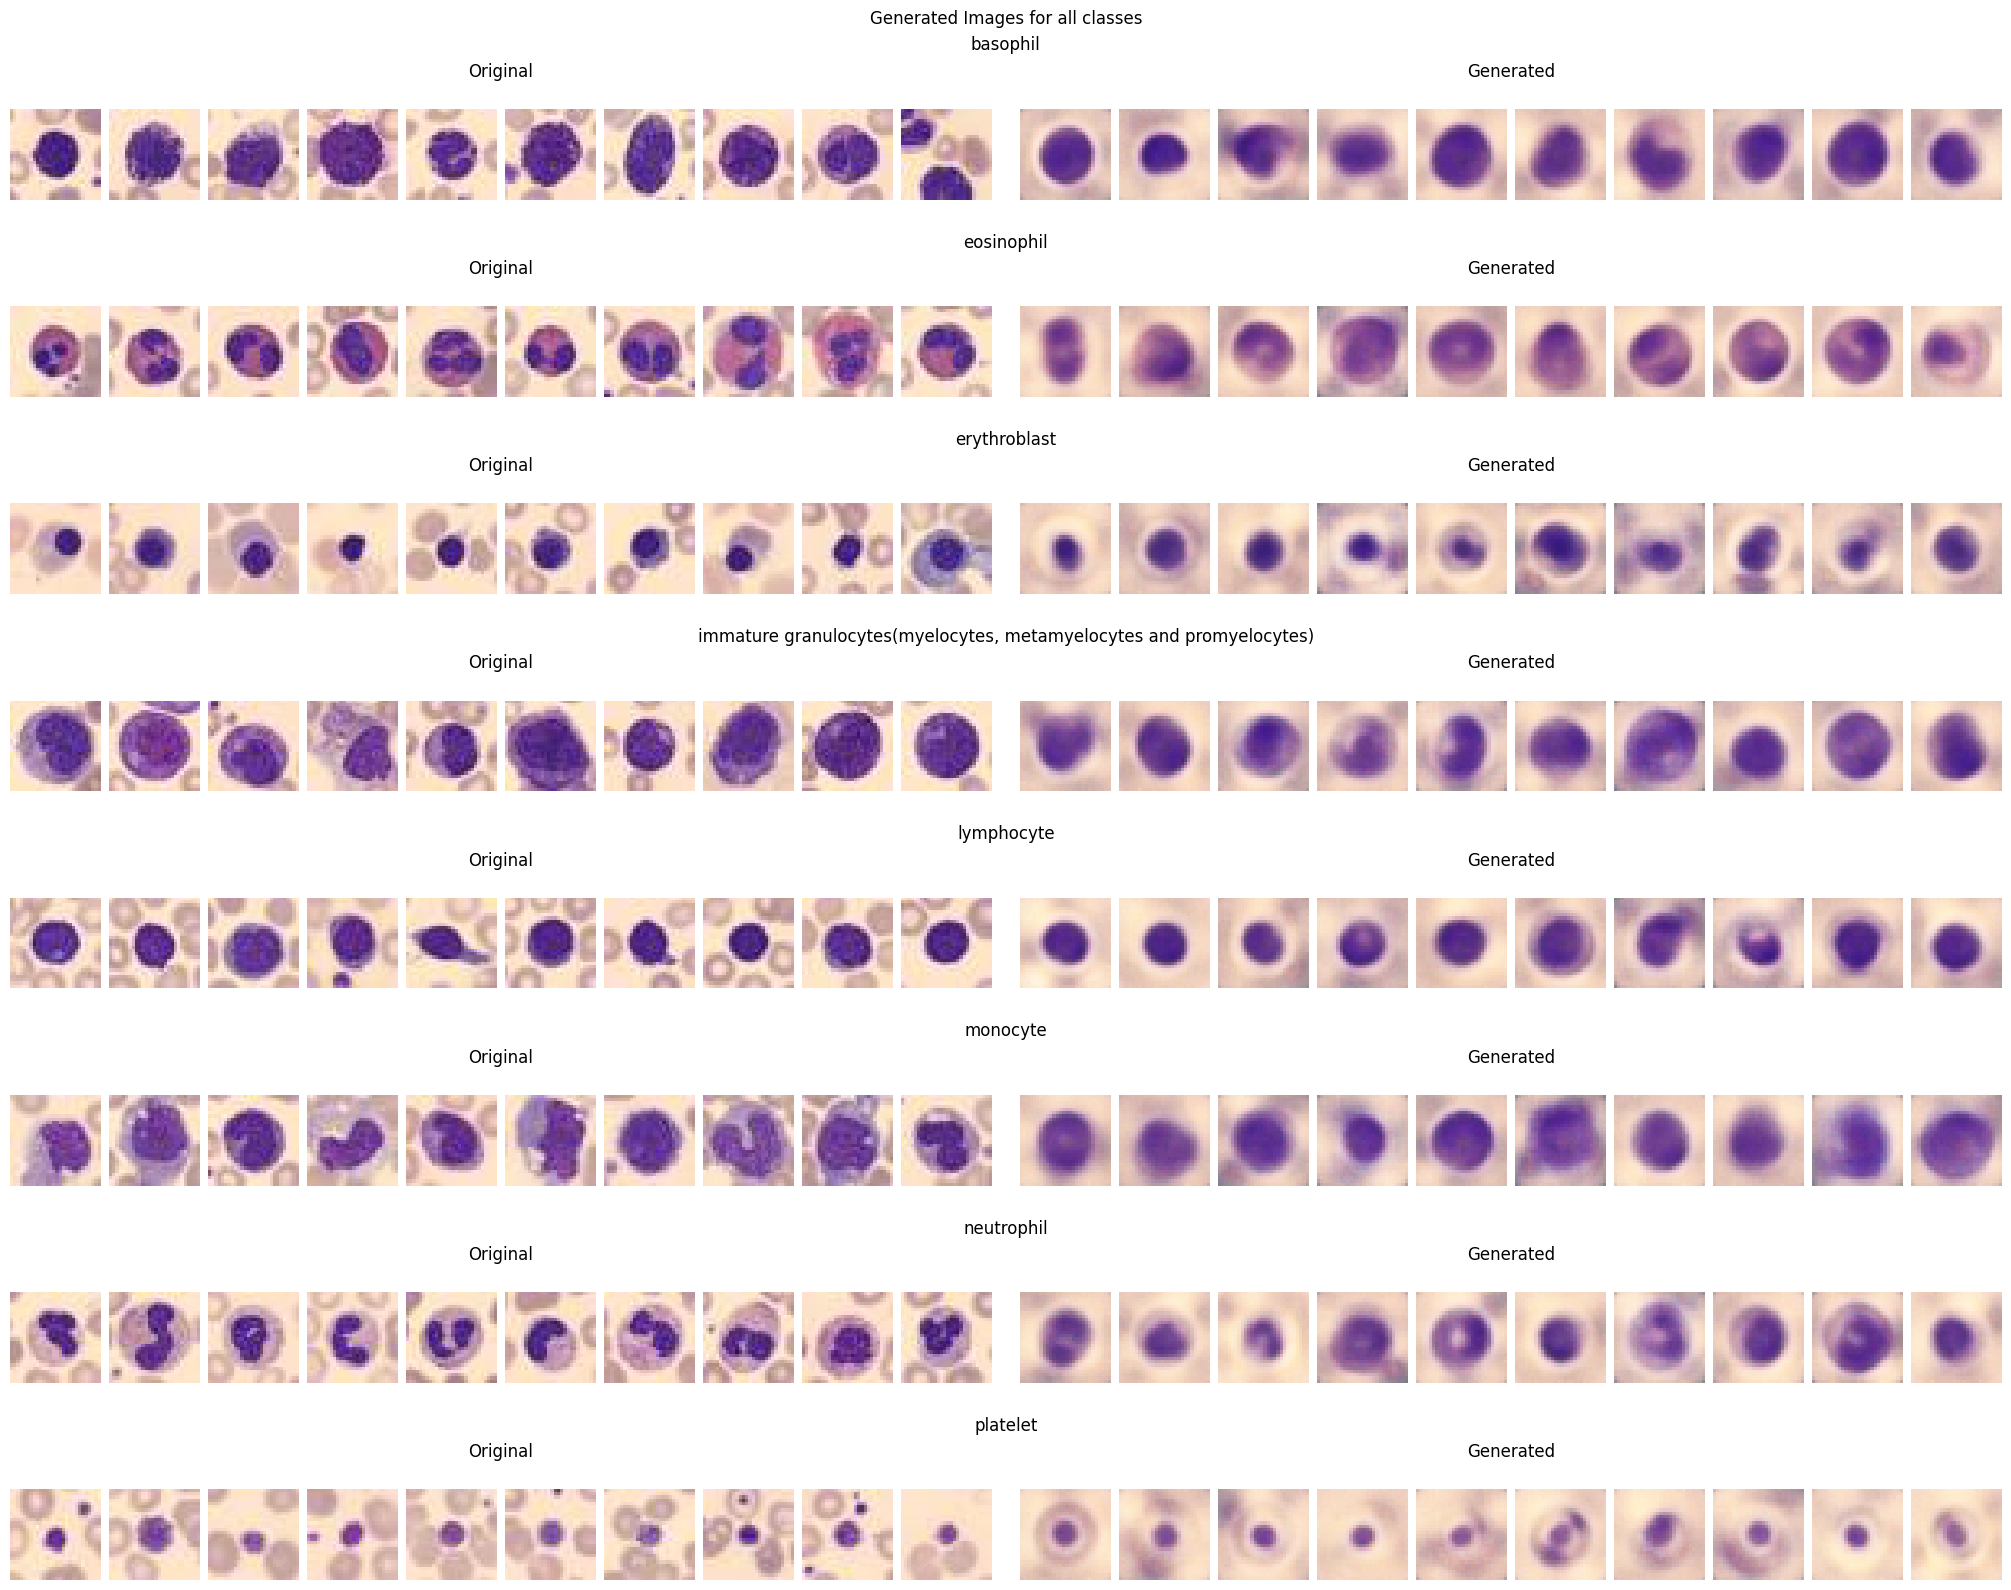

In [5]:

train_dataset = dataset.load_dataset(dataset_name="bloodmnist", split='train')
labels = list(train_dataset.info["label"].values())
samples_per_class = 10

# check if data is already one hot encoded
if not train_dataset[0][1].shape[0] > 1:  
    labels_train = torch.as_tensor(train_dataset.labels.squeeze()).to(torch.int64)
    train_dataset.labels = torch.nn.functional.one_hot(labels_train).numpy()

model = ConditionalVariationalAutoencoder(image_channels=train_dataset.info["n_channels"], n_labels=len(labels), latent_dimension=256, device=device).to(device)
model.load_state_dict(torch.load('../../../models/bloodmnist/cvae/lr-5e-05-bs-64-latent-256/checkpoint_100.pt'))

generate_images_for_each_class(model, train_dataset, labels, samples_per_class, device)

Using downloaded and verified file: /home/workstation/.medmnist/dermamnist.npz


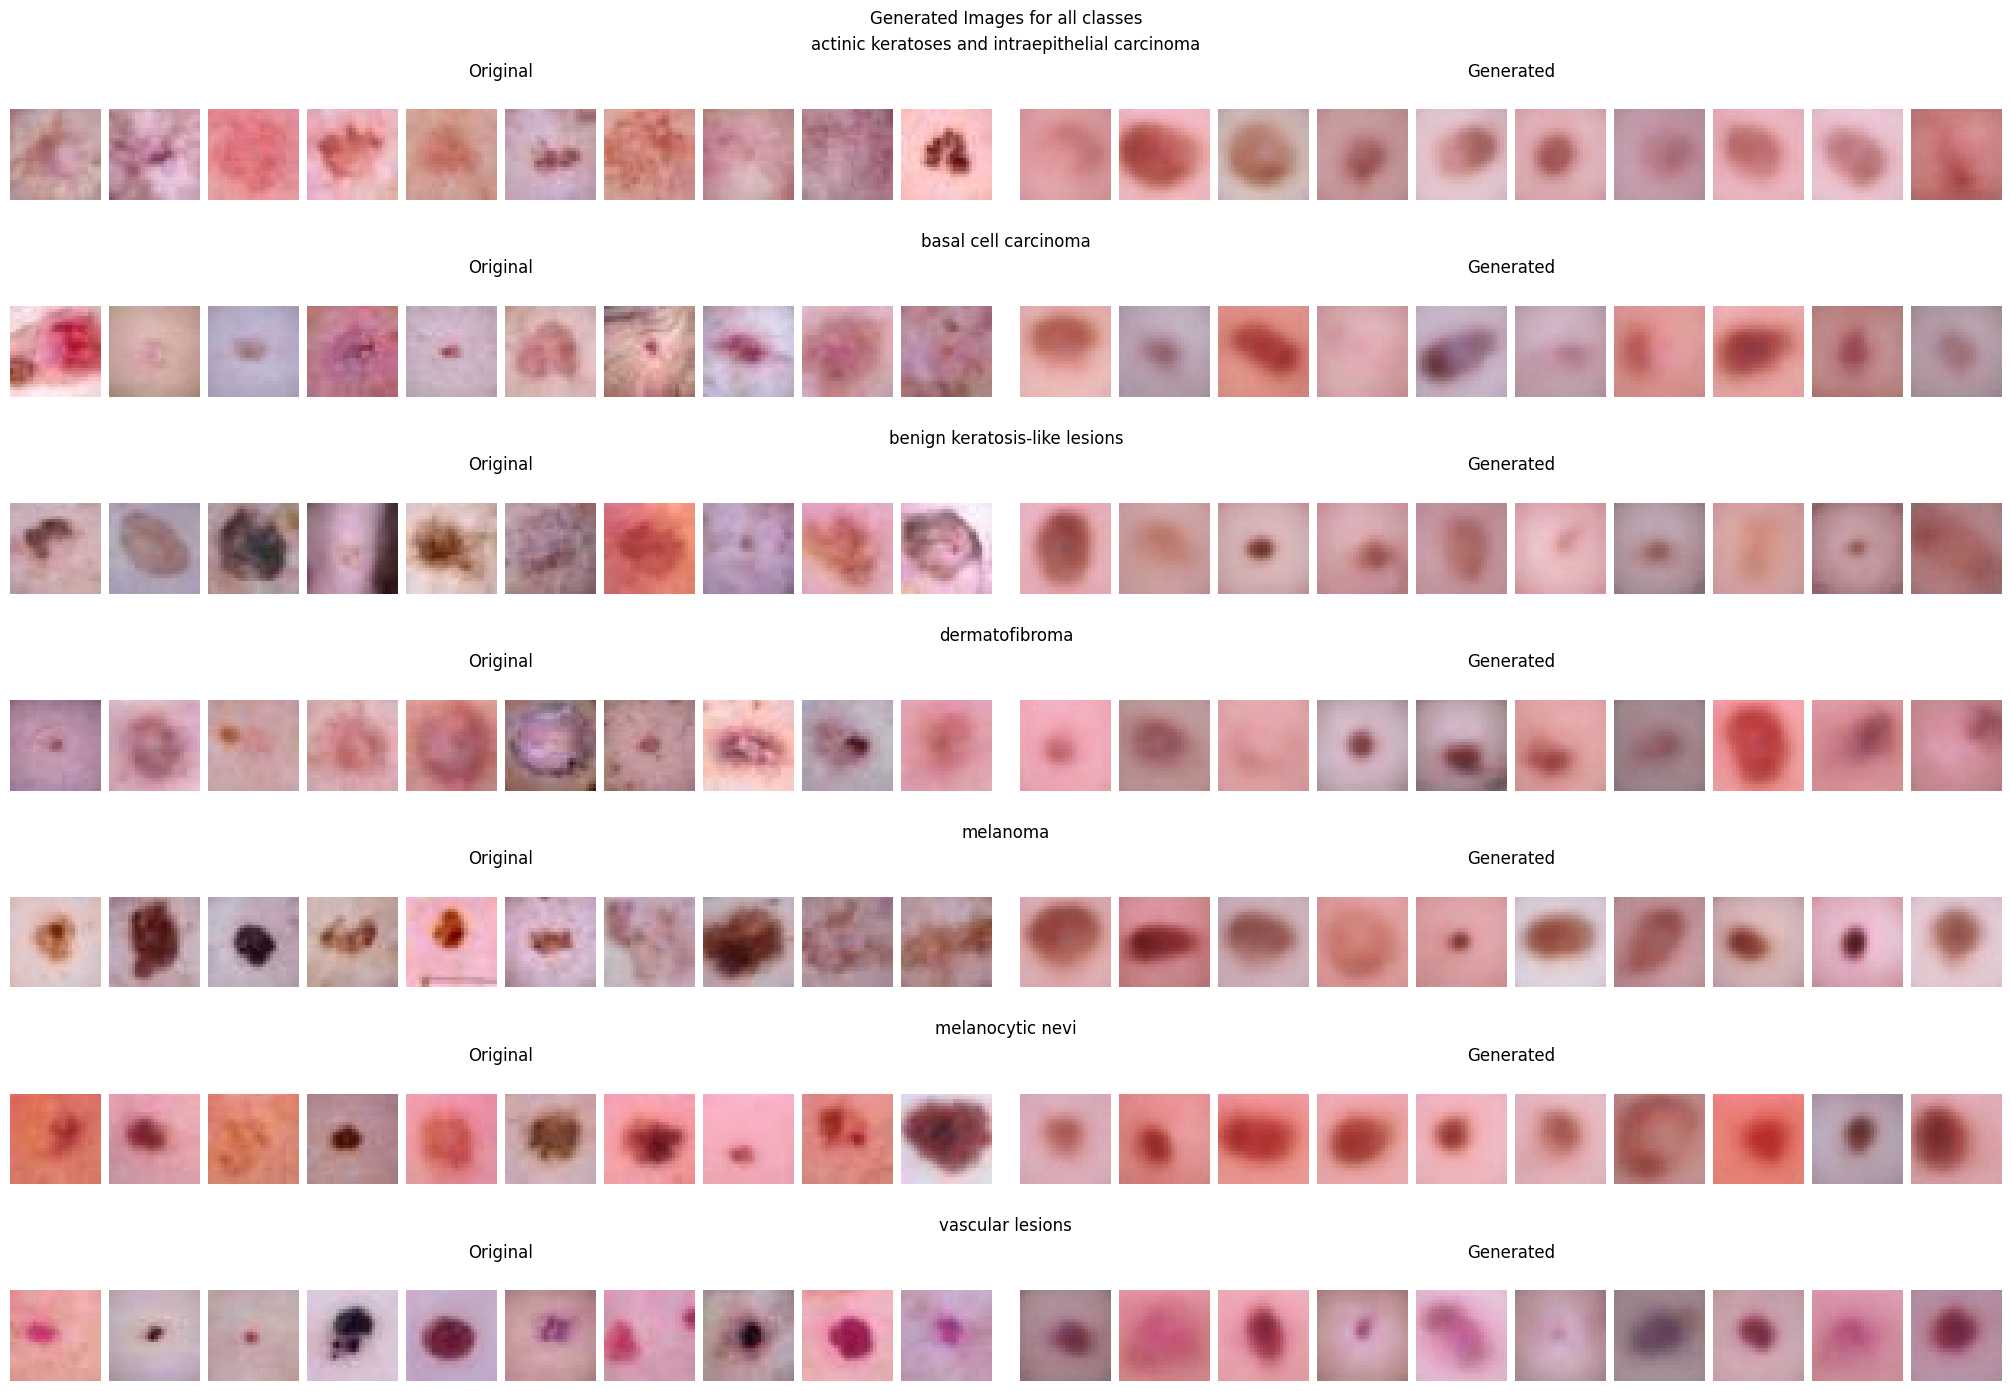

In [6]:
train_dataset = dataset.load_dataset(dataset_name="dermamnist", split='train')
labels = list(train_dataset.info["label"].values())
samples_per_class = 10

# check if data is already one hot encoded
if not train_dataset[0][1].shape[0] > 1:  
    labels_train = torch.as_tensor(train_dataset.labels.squeeze()).to(torch.int64)
    train_dataset.labels = torch.nn.functional.one_hot(labels_train).numpy()

model = ConditionalVariationalAutoencoder(image_channels=train_dataset.info["n_channels"], n_labels=len(labels), latent_dimension=256, device=device).to(device)
model.load_state_dict(torch.load('../../../models/dermamnist/cvae/lr-0.0005-bs-64-latent-256/checkpoint_100.pt'))

generate_images_for_each_class(model, train_dataset, labels, samples_per_class, device)

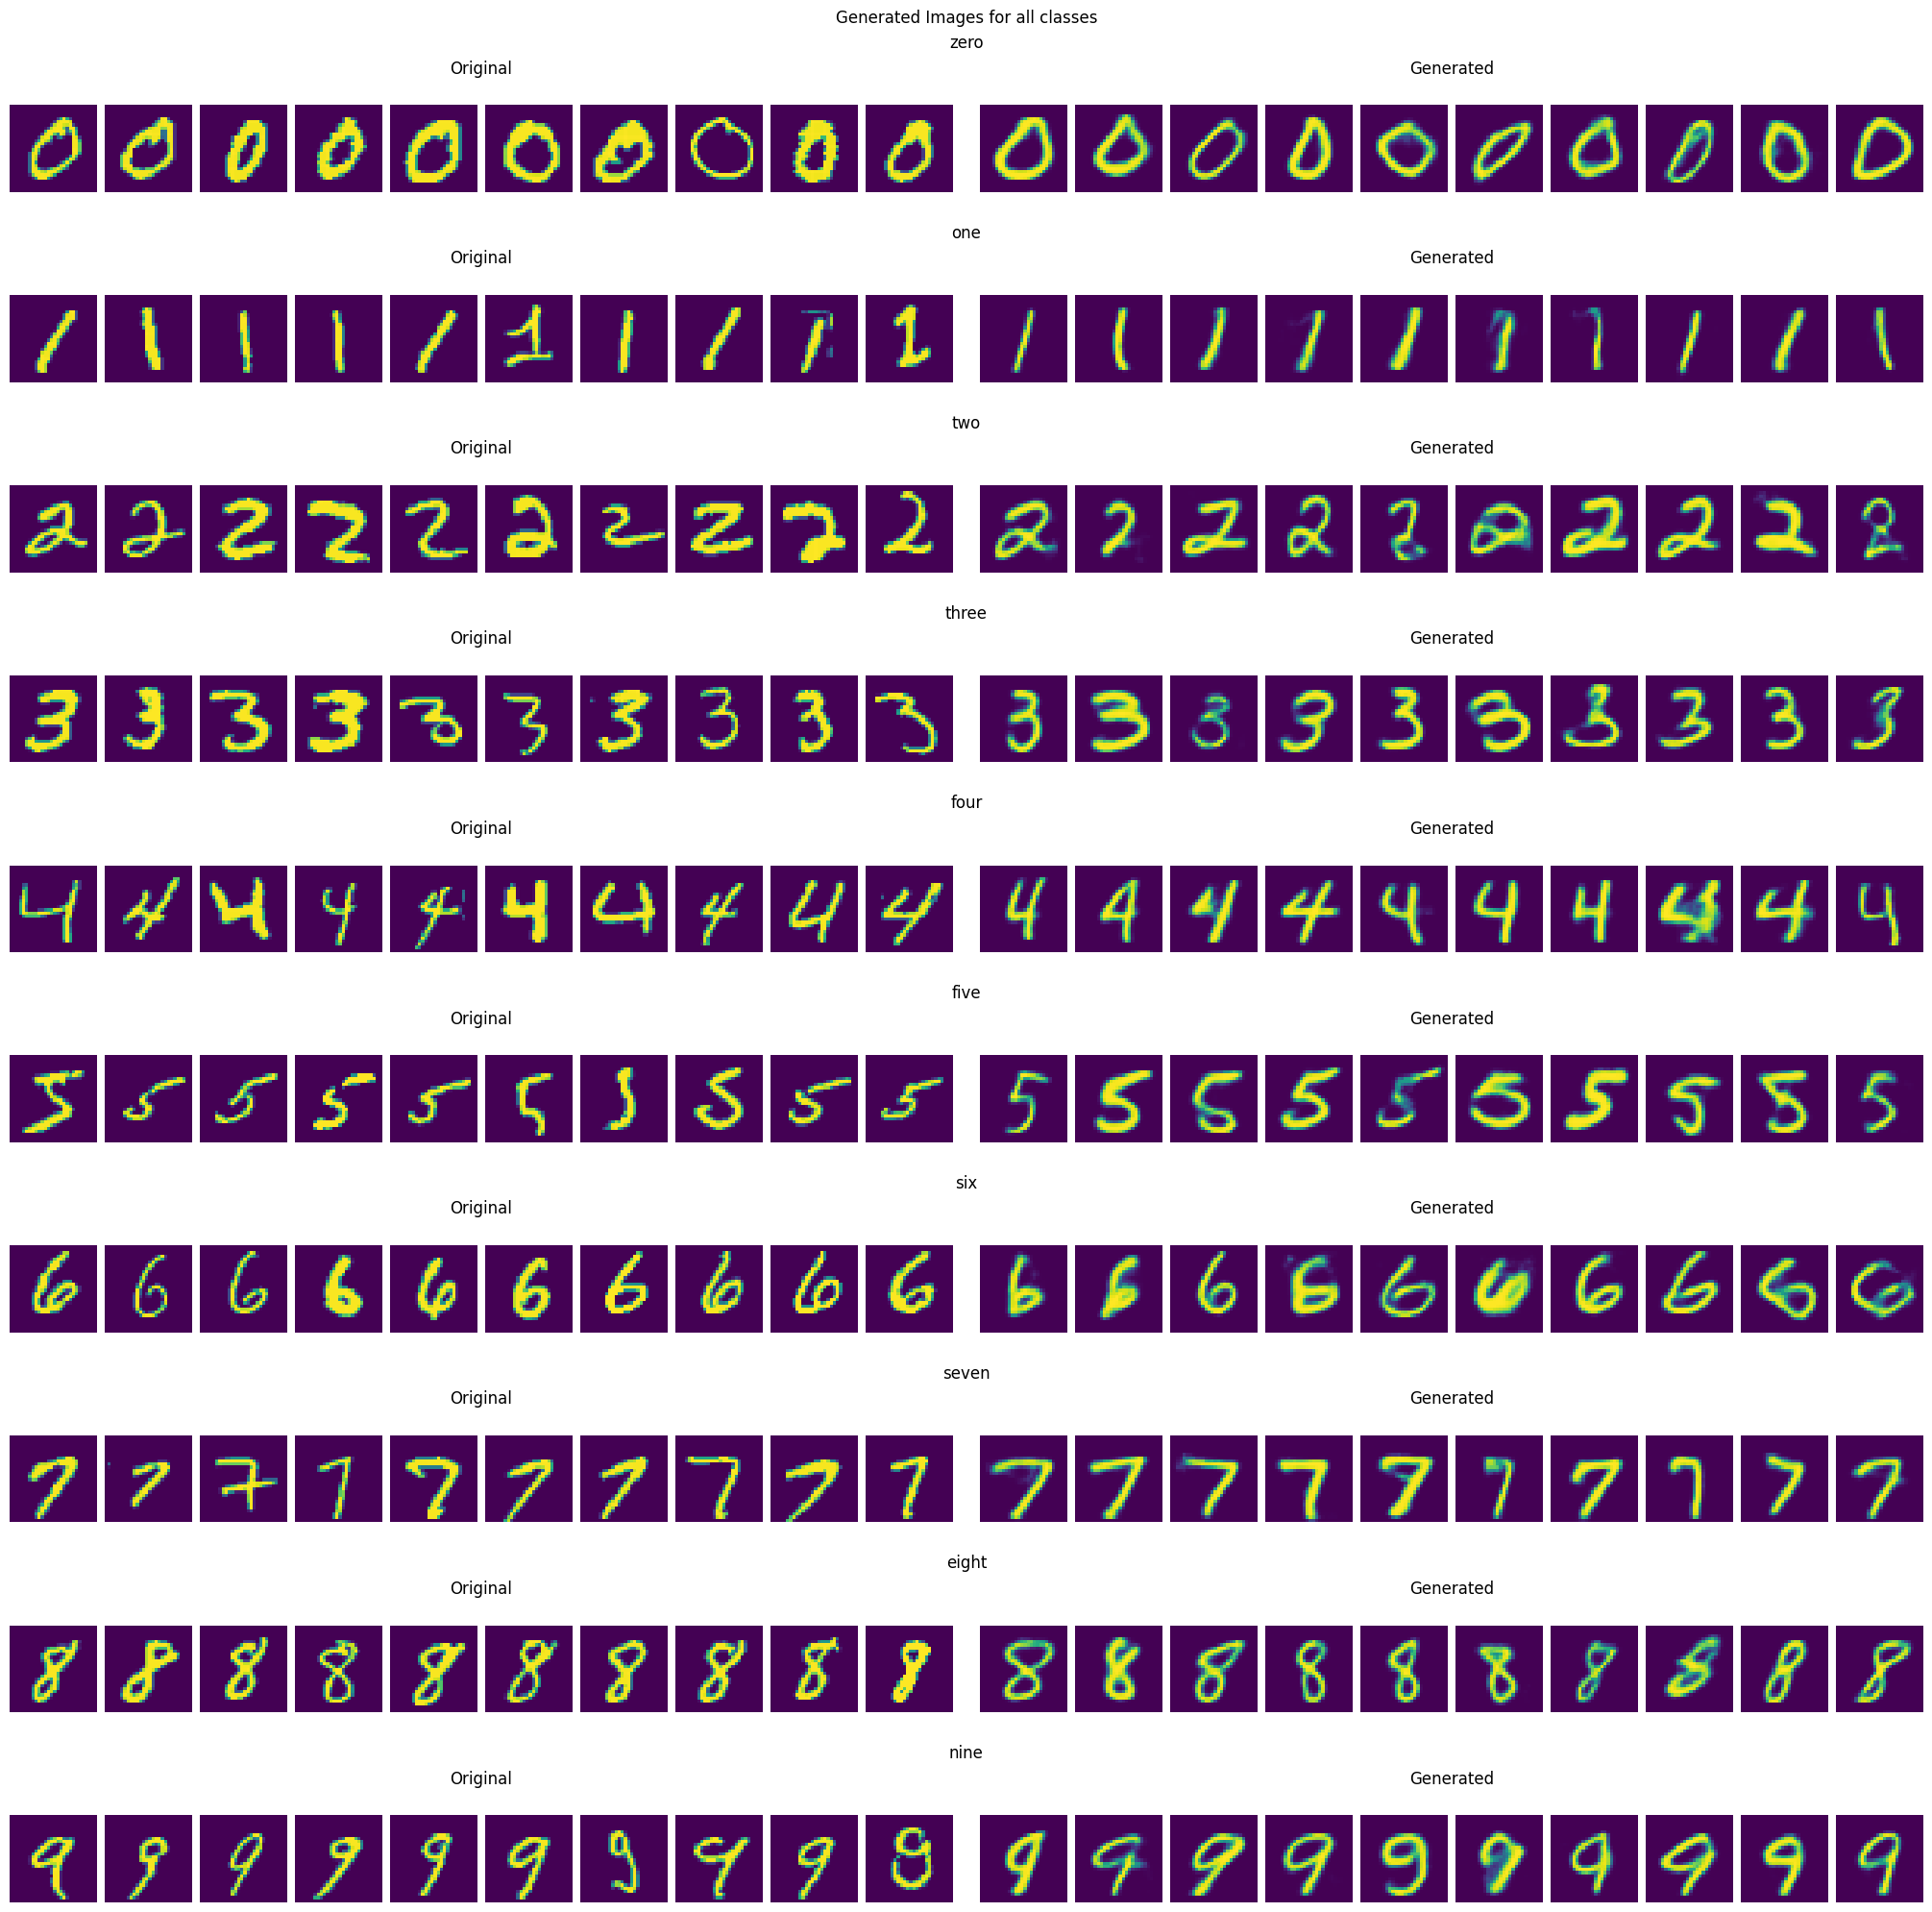

In [6]:
train_dataset = dataset.load_dataset(dataset_name="mnist", split='train')
labels = list(train_dataset.info["label"].values())
samples_per_class = 10

# check if data is already one hot encoded
if not train_dataset[0][1].shape[0] > 1:  
    labels_train = torch.as_tensor(train_dataset.labels.squeeze()).to(torch.int64)
    train_dataset.labels = torch.nn.functional.one_hot(labels_train).numpy()

model = ConditionalVariationalAutoencoder(image_channels=train_dataset.info["n_channels"], n_labels=len(labels), latent_dimension=128, device=device).to(device)
model.load_state_dict(torch.load('../../../models/mnist/cvae/lr-0.001-bs-64-latent-128/checkpoint_100.pt'))

generate_images_for_each_class(model, train_dataset, labels, samples_per_class, device)